In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Tratamiento previo de la imagen
img1 = cv2.imread('monedas.jpg')
img1 = cv2.resize(img1, (0, 0), fx=0.2, fy=0.2)  # para ajustar el tamaño
img1 = cv2.GaussianBlur(img1, (7, 7), 0)  # para suavizar la imagen


(np.float64(-0.5), np.float64(611.5), np.float64(815.5), np.float64(-0.5))

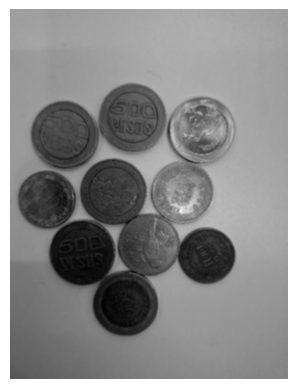

In [112]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)  #Convertir de BGR a RGB
img1_gray = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY) #Convertir de RGB a GRIS
plt.imshow(img1_gray, cmap='gray') 
plt.axis('off')


(np.float64(-0.5), np.float64(611.5), np.float64(815.5), np.float64(-0.5))

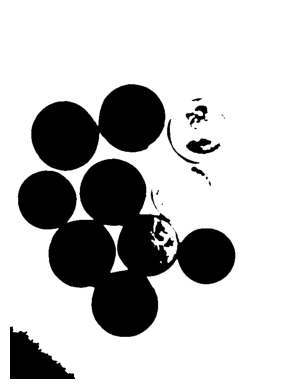

In [ ]:
#Se aplica la binarización y suavizado
blur = cv2.GaussianBlur(img1_gray, (7, 7), 0)
_, imgbin = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(imgbin, cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(611.5), np.float64(815.5), np.float64(-0.5))

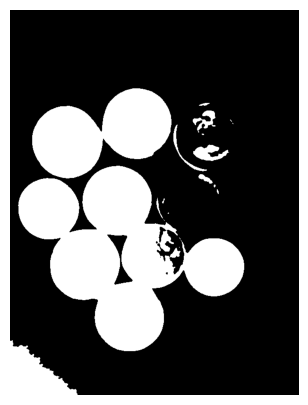

In [ ]:
#Se invierte la imagen binarizada
imgbin2 = 255 - imgbin
plt.figure(figsize=(10, 5))
plt.imshow(imgbin2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

(np.float64(-0.5), np.float64(611.5), np.float64(815.5), np.float64(-0.5))

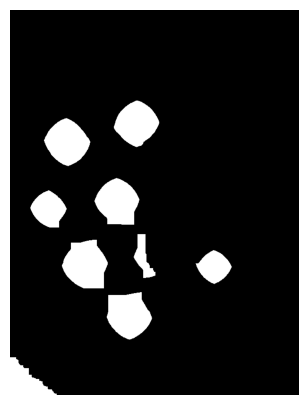

In [126]:
#Primera erosion

imgbin2_erosion = cv2.erode(imgbin2, np.ones((5, 5), np.uint8), iterations=11)
plt.figure(figsize=(10, 5))
plt.imshow(imgbin2_erosion, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

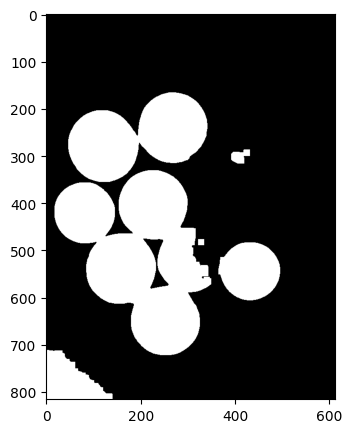

In [119]:
#Primera dilatacion
imgbin2_dilation = cv2.dilate(imgbin2_erosion, np.ones((5, 5), np.uint8), iterations=3)
plt.figure(figsize=(10, 5))
plt.imshow(imgbin2_dilation, cmap='gray', vmin=0, vmax=255)

In [127]:
_, markers = cv2.connectedComponents(imgbin2_erosion)
np.unique(markers)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

(np.float64(-0.5), np.float64(611.5), np.float64(815.5), np.float64(-0.5))

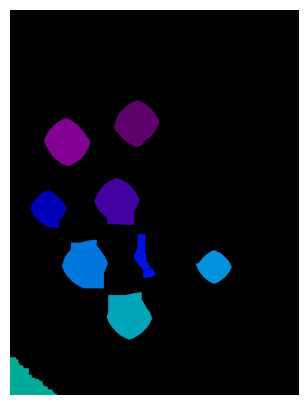

In [128]:
plt.figure(figsize=(10, 5))
plt.imshow(markers, cmap='nipy_spectral', vmin=0, vmax=24)
plt.axis('off')